In [88]:
import numpy as np

#def f(x):
#    return -x**2 + 4
#
#def F(x):
#    return -x**3 / 3 + 4*x
#
#a = -2
#b = 2
def f(x):
    return np.sin(x)

def F(x):
    return -np.cos(x)

a = 0
b = 3
K = 6

def exact_integral():
    return F(b) - F(a)
    
exact_integral()

1.9899924966004454

In [89]:
def trapezoidal_sum(f, N):
    h = (b - a) / N
    result = h * 0.5 * (f(a) + f(b))
    for i in range(1, N):
        result += h * f(a + i * h)
    return result

result_trap = np.zeros(K)
errors_trap = np.zeros(K)

for N in range(K):
    result_trap[N] = trapezoidal_sum(f, 2**N)
    errors_trap[N] = np.abs(result_trap[N] - exact_integral())
print(result_trap)
print(errors_trap)

[0.21168001 1.60208249 1.89582521 1.96661743 1.98415902 1.98853477]
[1.77831248e+00 3.87910011e-01 9.41672859e-02 2.33750650e-02
 5.83347505e-03 1.45772758e-03]


In [90]:
def romberg(f, N, p=False):
    Q = np.zeros((N, N))
    for i in range(N):
        Q[i, 0] = trapezoidal_sum(f, 2**(i+1))
        
    for k in range(1, N):
        for i in range(k, N):
            h_i = (b-a) / 2**i
            h_ik = (b-a) / 2**(i-k)
            Q[i, k] = Q[i, k-1] + (Q[i, k-1] - Q[i-1, k-1]) / ((h_ik**2) / (h_i**2) - 1)
    if p:
        print(Q)
    return Q[N-1, N-1]
    
result_romb = np.zeros(K)
errors_romb = np.zeros(K)

for N in range(K):
    result_romb[N] = romberg(f, N+1)
    errors_romb[N] = np.abs(result_romb[N] - exact_integral())
print(result_romb)
print(errors_romb)

[1.60208249 1.99373945 1.98997986 1.98999251 1.9899925  1.9899925 ]
[3.87910011e-01 3.74695563e-03 1.26322543e-05 1.11207259e-08
 2.46869192e-12 4.44089210e-16]


<IPython.core.display.Javascript object>


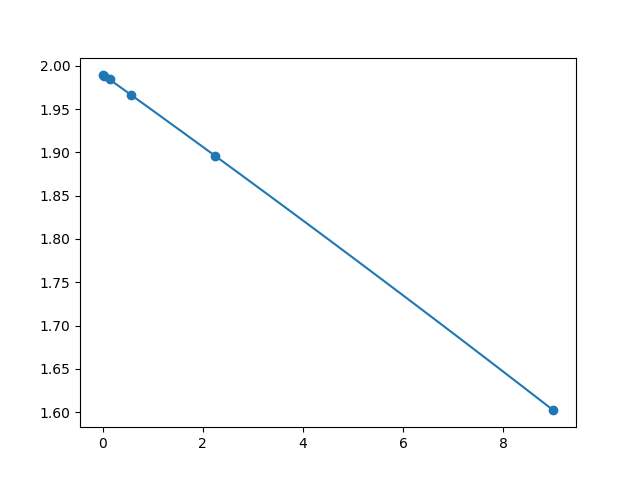

1.989992496600445

In [91]:
import matplotlib.pyplot as plt
%matplotlib notebook
import scipy.interpolate as sp_int
def visualize(f, N):
    h = np.zeros(N)
    Q = np.zeros(N)
    for i in range(N):
        h[i] = (b-a) / 2**i
        Q[i] = trapezoidal_sum(f, 2**(i+1))
    plt.scatter(h**2, Q)
    x = np.linspace(0, h[0]**2, 101)
    y = sp_int.barycentric_interpolate(h**2, Q, x)
    plt.plot(x, y)
    return y[0]

        
visualize(f, K)